In [326]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [327]:
import pandas as pd
import sqlite3

# Using Data from: The Numbers 

#### Loading and cleaning "The Numbers" dataset

In [328]:
TheNumbers = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
TheNumbers.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [329]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [330]:
# the values we want to use (production_budget, domestic_gross, and worldwide_gross) are strings
# strip commas and $ to then convert to integers 

In [331]:
punct = '$,'   # `|` is not present here
money_to_num = str.maketrans(dict.fromkeys(punct, ''))

#stripping dollar-sign and commas from relevant objects
TheNumbers['worldwide_gross'] = '|'.join(TheNumbers['worldwide_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['domestic_gross'] = '|'.join(TheNumbers['domestic_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['production_budget'] = '|'.join(TheNumbers['production_budget'].tolist()).translate(money_to_num).split('|')

In [332]:
#converting number strings to int64 types
TheNumbers['worldwide_gross'] = TheNumbers['worldwide_gross'].astype(np.int64)
TheNumbers['domestic_gross'] = TheNumbers['domestic_gross'].astype(np.int64)
TheNumbers['production_budget'] = TheNumbers['production_budget'].astype(np.int64)

In [333]:
#convert release date to a datetime
TheNumbers['release_date'] = pd.to_datetime(TheNumbers['release_date'])

In [334]:
# Adding new columns for new metrics 

In [335]:
#created variables for domestic profit, worldwide profit, domestic & worldwide profit margins (profit/gross)
#and domestic & worldwide ROIs (profit-production budget)
TheNumbers['domestic_profit'] = TheNumbers['domestic_gross'] - TheNumbers['production_budget']
TheNumbers['worldwide_profit'] = TheNumbers['worldwide_gross'] - TheNumbers['production_budget']
TheNumbers['domestic_margin'] = TheNumbers['domestic_profit'] / TheNumbers['domestic_gross']
TheNumbers['worldwide_margin'] = TheNumbers['worldwide_profit'] / TheNumbers['worldwide_gross']
TheNumbers['domestic_roi'] = TheNumbers['domestic_profit'] / TheNumbers['production_budget']
#makes sense to use value below as ROI
TheNumbers['worldwide_roi'] = TheNumbers['worldwide_profit'] / TheNumbers['production_budget']


In [336]:
TheNumbers['calendar_day'] = TheNumbers['release_date'].astype(str)

In [337]:
TheNumbers['calendar_day'][0] = TheNumbers['calendar_day'][0][-5:]

In [338]:
pd.options.mode.chained_assignment = None  # default='warn'

for date in TheNumbers['calendar_day']:
    TheNumbers['calendar_day'][date] = TheNumbers['calendar_day'][date][-5:]
    
    df.loc[df.A > 5, 'B']
    
#[TheNumbers['calendar_day'][date][-5:] for TheNumbers['calendar_day'][date] in TheNumbers['calendar_day'] ]

KeyError: '12-18'

In [339]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi,calendar_day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,0.441163,0.846921,0.789430,5.532577,12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.703283,0.607331,-0.412899,1.546673,2011-05-20
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.184770,-1.337036,-0.877822,-0.572108,2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.279748,0.764364,0.388403,3.243841,2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.488859,0.759251,0.956408,3.153696,2017-12-15


In [340]:
# confirming new columns and non strings values
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   domestic_profit    5782 non-null   int64         
 7   worldwide_profit   5782 non-null   int64         
 8   domestic_margin    5782 non-null   float64       
 9   worldwide_margin   5782 non-null   float64       
 10  domestic_roi       5782 non-null   float64       
 11  worldwide_roi      5782 non-null   float64       
 12  calendar_day       5782 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory us

# IMDB data

####  Loading "IMDB" dataset

In [341]:
conn = sqlite3.connect('./zippedData/im.db')

In [342]:
pd.read_sql("""
SELECT *
FROM sqlite_master
;""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Actors

#### Selecting actor data to work from

In [343]:
# Joined tables: movie_basics and persons to principals. Selected only the matching records.
actors = pd.read_sql(
"""
SELECT
    category,
    pr.movie_id,
    pr.person_id,
    primary_name,
    primary_title 
FROM 
    principals AS pr
JOIN
    movie_basics AS mb using(movie_id)
JOIN
    persons AS pe using(person_id)
WHERE
    category = 'actor'
    or
    category = 'actress'
    or
    category = 'self'
""",conn)
actors

,category,movie_id,person_id,primary_name,primary_title
0,actor,tt0111414,nm0246005,Tommy Dysart,A Thin Life
1,actress,tt0323808,nm3579312,Brittania Nicol,The Wicker Tree
2,actor,tt0323808,nm2694680,Henry Garrett,The Wicker Tree
3,actor,tt0323808,nm0574615,Graham McTavish,The Wicker Tree
4,actress,tt0323808,nm0502652,Jacqueline Leonard,The Wicker Tree
...,...,...,...,...,...
468072,actor,tt9689618,nm10439726,Christian Lacroix,Moonface. A woman in the war.
468073,actor,tt9689618,nm10439727,Christine Spengler,Moonface. A woman in the war.
468074,actor,tt9689618,nm10439724,Phillippe Warner,Moonface. A woman in the war.
468075,actor,tt9692684,nm0186469,Kenneth Cranham,Disnatured


#### Merging "Actors" DataFrame (extracted from "IMDB") with "The Numbers" DataFrame on 'primary_title' and 'movie'

In [344]:
actors_df = pd.merge(actors,
                  TheNumbers,
                  left_on='primary_title',
                  right_on='movie')

actors_df

,category,movie_id,person_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi,calendar_day
0,actor,tt0475290,nm0000982,Josh Brolin,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622,0.657111,0.367283,1.916395,2016-02-05
1,actor,tt0475290,nm0000123,George Clooney,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622,0.657111,0.367283,1.916395,2016-02-05
2,actor,tt0475290,nm2403277,Alden Ehrenreich,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622,0.657111,0.367283,1.916395,2016-02-05
3,actor,tt0475290,nm0000146,Ralph Fiennes,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622,0.657111,0.367283,1.916395,2016-02-05
4,actor,tt10300704,nm0006763,Jackie Shroff,Walter,96,2015-03-13,Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.000000,-1.000000,2015-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,actor,tt9805168,nm10487076,E. Iderbold,Traitor,25,2008-08-27,Traitor,22000000,23530831,27882226,1530831,5882226,0.065056,0.210967,0.069583,0.267374,2008-08-27
13954,actor,tt9805168,nm10480867,N. Yalalt,Traitor,25,2008-08-27,Traitor,22000000,23530831,27882226,1530831,5882226,0.065056,0.210967,0.069583,0.267374,2008-08-27
13955,actor,tt9805168,nm10487077,A. Önörjargal,Traitor,25,2008-08-27,Traitor,22000000,23530831,27882226,1530831,5882226,0.065056,0.210967,0.069583,0.267374,2008-08-27
13956,actor,tt7694546,nm9457389,Dongchao Tai,Beowulf,88,2007-11-16,Beowulf,150000000,82280579,195080579,-67719421,45080579,-0.823030,0.231087,-0.451463,0.300537,2007-11-16


In [345]:
# confirming columns on new merged DataFrame, absence of nulls, and non-string values for financial metrics
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13958 entries, 0 to 13957
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           13958 non-null  object        
 1   movie_id           13958 non-null  object        
 2   person_id          13958 non-null  object        
 3   primary_name       13958 non-null  object        
 4   primary_title      13958 non-null  object        
 5   id                 13958 non-null  int64         
 6   release_date       13958 non-null  datetime64[ns]
 7   movie              13958 non-null  object        
 8   production_budget  13958 non-null  int64         
 9   domestic_gross     13958 non-null  int64         
 10  worldwide_gross    13958 non-null  int64         
 11  domestic_profit    13958 non-null  int64         
 12  worldwide_profit   13958 non-null  int64         
 13  domestic_margin    13958 non-null  float64       
 14  worldw

In [368]:
#
top_reliable_actors = actors_df.value_counts('primary_name').head(19)
top_reliable_actors

primary_name
Kevin Hart             19
Mark Wahlberg          19
Dwayne Johnson         19
Robert De Niro         18
Liam Neeson            18
Channing Tatum         17
Joel Edgerton          17
Steve Carell           17
Johnny Depp            16
Matthew McConaughey    16
Chris Hemsworth        15
Nicole Kidman          15
Michael Fassbender     15
Owen Wilson            15
Matt Damon             15
Nicolas Cage           15
Anna Kendrick          15
Jennifer Lawrence      15
Tom Hardy              15
dtype: int64

In [369]:
top_actors = list(top_reliable_actors.index)

top_actors

['Kevin Hart',
 'Mark Wahlberg',
 'Dwayne Johnson',
 'Robert De Niro',
 'Liam Neeson',
 'Channing Tatum',
 'Joel Edgerton',
 'Steve Carell',
 'Johnny Depp',
 'Matthew McConaughey',
 'Chris Hemsworth',
 'Nicole Kidman',
 'Michael Fassbender',
 'Owen Wilson',
 'Matt Damon',
 'Nicolas Cage',
 'Anna Kendrick',
 'Jennifer Lawrence',
 'Tom Hardy']

In [370]:
avg_profit_of_movie_per_actor = []

for actor in top_actors:
    actor_filter = actors_df.loc[actors_df['primary_name'] == actor]
    avg_profit_of_movie_per_actor.append(actor_filter.worldwide_profit.mean())
    
avg_profit_of_movie_per_actor

[142984495.10526314,
 137891808.0526316,
 329997202.68421054,
 53687091.777777776,
 104063632.1111111,
 107753628.64705883,
 29842502.94117647,
 166251075.47058824,
 184810854.8125,
 103858957.625,
 297081697.26666665,
 5974474.4,
 65386806.06666667,
 104935279.6,
 117038249.46666667,
 38278277.333333336,
 81979718.26666667,
 241432787.8,
 176755894.06666666]

In [377]:
type(avg_profit_of_movie_per_actor)

list

In [391]:
actor_profits_df = pd.DataFrame(list(zip(top_actors, avg_profit_of_movie_per_actor)),
               columns =['top_actors', 'average_profits'])

In [392]:
actor_profits_df.sort_values(by='average_profits', inplace=True, ascending=False)
actor_profits_df

,top_actors,average_profits
2,Dwayne Johnson,3.299972e+08
10,Chris Hemsworth,2.970817e+08
17,Jennifer Lawrence,2.414328e+08
8,Johnny Depp,1.848109e+08
18,Tom Hardy,1.767559e+08
7,Steve Carell,1.662511e+08
0,Kevin Hart,1.429845e+08
1,Mark Wahlberg,1.378918e+08
14,Matt Damon,1.170382e+08
5,Channing Tatum,1.077536e+08


In [395]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [396]:
actor_profits_df

,top_actors,average_profits
2,Dwayne Johnson,329997202.684210539
10,Chris Hemsworth,297081697.266666651
17,Jennifer Lawrence,241432787.800000012
8,Johnny Depp,184810854.812500000
18,Tom Hardy,176755894.066666663
7,Steve Carell,166251075.470588237
0,Kevin Hart,142984495.105263144
1,Mark Wahlberg,137891808.052631587
14,Matt Damon,117038249.466666669
5,Channing Tatum,107753628.647058830


# Visualizing Potential Impact of Actor

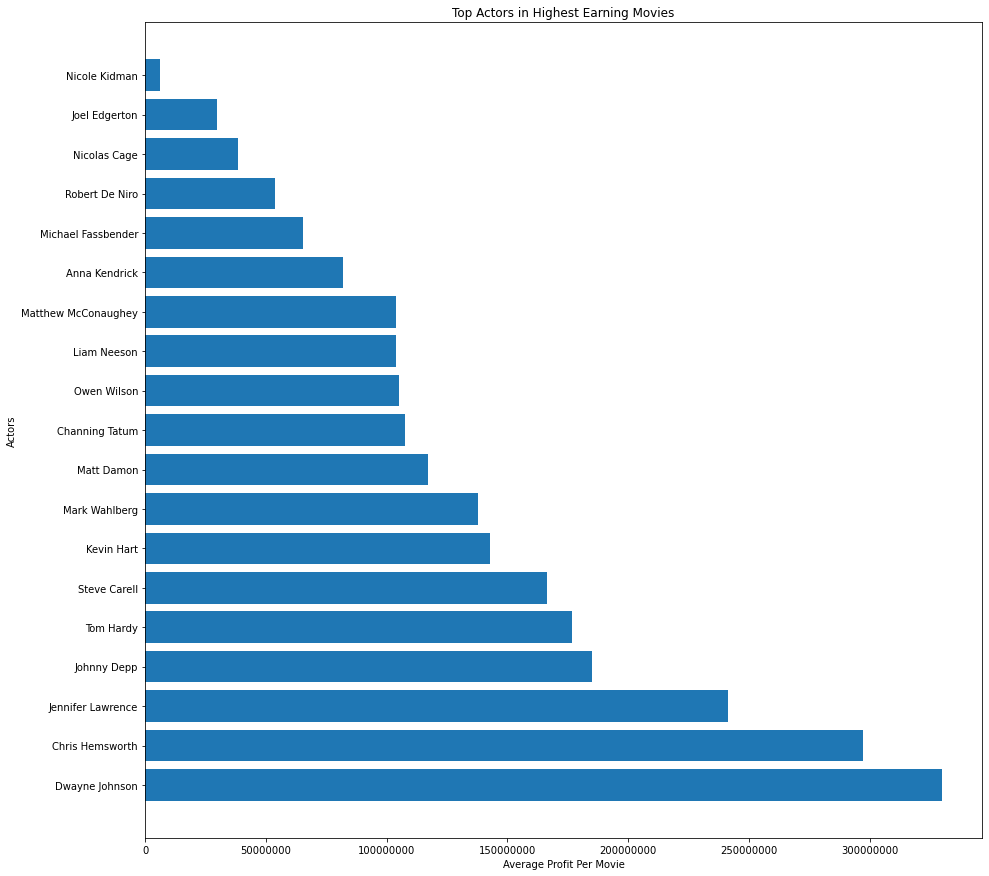

In [399]:
fig, ax = plt.subplots(figsize=(15,15))


x = 'average_profits'
y = 'top_actors'

ax.set_title("Top Actors in Highest Earning Movies")
ax.set_xlabel("Average Profit Per Movie")
ax.set_ylabel("Actors")

ax.ticklabel_format(axis='x', style='plain')

ax.barh(width=x, y=y, data=actor_profits_df);

In [ ]:

#for actor,frame in top_actors.items():
#    if len(frame.index) >= 3:
#        actor_roi[actor] = frame['roi'].mean()

In [ ]:
#top25_actors = list(top25_actors.index)

#top25_actors

In [256]:
#top_actors = actors_df.sort_values(by='worldwide_gross', ascending=False).head(10000)
#top_actors

In [ ]:
#top_actors_list = top_actors['primary_name'].unique().tolist()
#top_actors_list

In [400]:
#len(top_actors_list)

In [ ]:
#actors_dict = {x: top_actors[top_actors.primary_name.str.contains(x)] for x in top_actors_list}
#actors_dict

In [ ]:
#actor_corr = dict.fromkeys(top_actors_list)
#actor_corr

In [ ]:
#actors_dict['Mizuki Sashide']

In [ ]:
#for actor,frame in actors_dict.items():
#    if len(frame.index) >= 3:
#        actor_corr[actor] = frame['production_budget'].corr(frame['worldwide_profit'])
#         print(f"{actor}: {corr}")
#    else:
#        del actor_corr[actor] 

In [ ]:
#actor_corr = dict(sorted(actor_corr.items(), key=lambda item: item[1], reverse=True))
#actor_corr

In [ ]:
#actors_dict["Tom Hanks"]

## Directors

In [401]:
directors = pd.read_sql(
"""
SELECT
    category,
    pr.movie_id,
    pr.person_id,
    primary_name,
    primary_title 
FROM 
    principals AS pr
JOIN
    movie_basics AS mb using(movie_id)
JOIN
    persons AS pe using(person_id)
WHERE
    category = 'director'
""",conn)
directors

,category,movie_id,person_id,primary_name,primary_title
0,director,tt0111414,nm0398271,Frank Howson,A Thin Life
1,director,tt0323808,nm0362736,Robin Hardy,The Wicker Tree
2,director,tt0417610,nm1145057,Alejandro Chomski,Asleep in the Sun
3,director,tt0469152,nm0707738,Alyssa R. Bennett,Smoking/Non-Smoking
4,director,tt0473032,nm0776090,J. Neil Schulman,Escape from Heaven
...,...,...,...,...,...
146388,director,tt9679036,nm9728620,Julia Beney,"A Girl, a Boy, a Penny and a Very, Very, Very ..."
146389,director,tt9681728,nm10436661,Alexander Zolotukhin,A Russian Youth
146390,director,tt9689618,nm9652770,Xavi Herrero,Moonface. A woman in the war.
146391,director,tt9689618,nm10439725,Xavi Herrero,Moonface. A woman in the war.


In [404]:
directors_df = pd.merge(directors,
                  TheNumbers,
                  left_on='primary_title',
                  right_on='movie')

directors_df

,category,movie_id,person_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi,calendar_day
0,director,tt0475290,nm0001053,Ethan Coen,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622492,0.657110866,0.367282955,1.916394545,2016-02-05
1,director,tt0475290,nm0001054,Joel Coen,"Hail, Caesar!",22,2016-02-05,"Hail, Caesar!",22000000,30080225,64160680,8080225,42160680,0.268622492,0.657110866,0.367282955,1.916394545,2016-02-05
2,director,tt10300704,nm10678795,Anbarasan,Walter,96,2015-03-13,Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.000000000,-1.000000000,2015-03-13
3,director,tt2016335,nm1457361,Anna Mastro,Walter,96,2015-03-13,Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.000000000,-1.000000000,2015-03-13
4,director,tt3558672,nm6315709,Daniela Imhoff,Walter,96,2015-03-13,Walter,700000,0,0,-700000,-700000,-inf,-inf,-1.000000000,-1.000000000,2015-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,director,tt7961060,nm0619110,Tatsuya Nagamine,Dragon Ball Super: Broly,36,2019-01-16,Dragon Ball Super: Broly,8500000,30376755,122747755,21876755,114247755,0.720180776,0.930752298,2.573735882,13.440912353,2019-01-16
3865,director,tt6962340,nm3258280,Anand Vrs Tomar,The Touch,10,2004-03-31,The Touch,20000000,0,5918742,-20000000,-14081258,-inf,-2.379096436,-1.000000000,-0.704062900,2004-03-31
3866,director,tt9805168,nm4991904,Janchivdorj Sengedorj,Traitor,25,2008-08-27,Traitor,22000000,23530831,27882226,1530831,5882226,0.065056393,0.210966872,0.069583227,0.267373909,2008-08-27
3867,director,tt7694546,nm9457387,Zefei Liu,Beowulf,88,2007-11-16,Beowulf,150000000,82280579,195080579,-67719421,45080579,-0.823030438,0.231086965,-0.451462807,0.300537193,2007-11-16


In [405]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869 entries, 0 to 3868
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           3869 non-null   object        
 1   movie_id           3869 non-null   object        
 2   person_id          3869 non-null   object        
 3   primary_name       3869 non-null   object        
 4   primary_title      3869 non-null   object        
 5   id                 3869 non-null   int64         
 6   release_date       3869 non-null   datetime64[ns]
 7   movie              3869 non-null   object        
 8   production_budget  3869 non-null   int64         
 9   domestic_gross     3869 non-null   int64         
 10  worldwide_gross    3869 non-null   int64         
 11  domestic_profit    3869 non-null   int64         
 12  worldwide_profit   3869 non-null   int64         
 13  domestic_margin    3869 non-null   float64       
 14  worldwid

In [410]:
top_reliable_directors = directors_df.value_counts('primary_name').head(28)
top_reliable_directors

primary_name
Tim Story             9
Steven Spielberg      8
David Gordon Green    8
Steven Soderbergh     7
Ridley Scott          7
Denis Villeneuve      6
Jon M. Chu            6
Clint Eastwood        6
Tim Burton            6
Jaume Collet-Serra    6
Peter Berg            6
Zack Snyder           5
Simon West            5
Roland Emmerich       5
David O. Russell      5
Ron Howard            5
Nicholas Stoller      5
Paul W.S. Anderson    5
Paul Feig             5
Robert Rodriguez      5
Danny Boyle           5
Brad Peyton           5
Antoine Fuqua         5
M. Night Shyamalan    5
Francis Lawrence      5
David Ayer            5
Jonathan Levine       5
Guillermo del Toro    5
dtype: int64

In [412]:
top_directors = list(top_reliable_directors.index)
top_directors

['Tim Story',
 'Steven Spielberg',
 'David Gordon Green',
 'Steven Soderbergh',
 'Ridley Scott',
 'Denis Villeneuve',
 'Jon M. Chu',
 'Clint Eastwood',
 'Tim Burton',
 'Jaume Collet-Serra',
 'Peter Berg',
 'Zack Snyder',
 'Simon West',
 'Roland Emmerich',
 'David O. Russell',
 'Ron Howard',
 'Nicholas Stoller',
 'Paul W.S. Anderson',
 'Paul Feig',
 'Robert Rodriguez',
 'Danny Boyle',
 'Brad Peyton',
 'Antoine Fuqua',
 'M. Night Shyamalan',
 'Francis Lawrence',
 'David Ayer',
 'Jonathan Levine',
 'Guillermo del Toro']

In [415]:
avg_profit_of_movie_per_director = []

for director in top_directors:
    director_filter = directors_df.loc[directors_df['primary_name'] == director]
    avg_profit_of_movie_per_director.append(director_filter.worldwide_profit.mean())
    
avg_profit_of_movie_per_director

[48457857.44444445,
 164754974.375,
 42364834.5,
 45581726.85714286,
 176967321.2857143,
 57327861.166666664,
 150242933.66666666,
 137916026.66666666,
 190861143.33333334,
 75478617.16666667,
 34929965.833333336,
 294184022.8,
 38949677.2,
 40345984.4,
 113364526.0,
 62628345.4,
 104627034.8,
 153293991.0,
 174341927.8,
 48152771.4,
 24089305.2,
 185171680.0,
 98183459.2,
 176831934.6,
 404238308.6,
 127467723.4,
 33089379.4,
 97190623.6]

In [ ]:
# complete in the AM
actor_profits_df = pd.DataFrame(list(zip(top_actors, avg_profit_of_movie_per_actor)),
               columns =['top_actors', 'average_profits'])

In [ ]:
actor_profits_df.sort_values(by='average_profits', inplace=True, ascending=False)
actor_profits_df

In [ ]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [ ]:
actor_profits_df

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))


x = 'average_profits'
y = 'top_actors'

ax.set_title("Top Actors in Highest Earning Movies")
ax.set_xlabel("Average Profit Per Movie")
ax.set_ylabel("Actors")

ax.ticklabel_format(axis='x', style='plain')

ax.barh(width=x, y=y, data=actor_profits_df);